# Revisión de overfitting para el clasificador Gradient Boosting  
En este notebook vamos a revisar si la clasificación con Gradient Boosting está overfitted o sobreajustada.
    
> Se dice que un modelo que se ajusta bien al conjunto de entrenamiento, pero que es deficiente en el conjunto de prueba, está "overfitted" o sobreajustado al conjunto de entrenamiento y que un modelo que se ajusta mal a ambos conjuntos se encuentra "underfit".
>
> — <cite>[Este artículo](https://towardsdatascience.com/the-relationship-between-bias-variance-overfitting-generalisation-in-machine-learning-models-fb78614a3f1e)</cite>

El código utilizado está en [esta página](https://towardsdatascience.com/how-to-check-if-a-classification-model-is-overfitted-using-scikit-learn-148b6b19af8b)

## Cargamos los datos

In [1]:
# Importamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [2]:
# Importamos los datos
datos = ['../data/RD_GBC_0', '../data/RD_GBC_1', '../data/RD_GBC_2', '../data/RD_GBC_3', '../data/RD_GBC_4',
        '../data/RD_GBC_5', '../data/RD_GBC_6', '../data/RD_GBC_7', '../data/RD_GBC_8', '../data/RD_GBC_9']
df = pd.DataFrame()

for path in datos:
    df_i = pd.read_csv(path)
    df = pd.concat([df, df_i])
    
df.shape

(512000, 18)

Observamos la tabla de datos

In [3]:
df.head()

,pT_j1,m_j1,eta_j1,phi_j1,E_j1,tau_21_j1,nhadrones_j1,pT_j2,m_j2,eta_j2,phi_j2,E_j2,tau_21_j2,nhadrones_j2,m_jj,deltaR_j12,n_hadrones,label
0,1286.727685,106.912129,0.185508,-2.763676,1313.290435,0.624659,36,1283.220733,63.164215,0.064989,0.393688,1287.481934,0.713248,33,170.076344,3.159663,109.0,0.0
1,1354.394070,614.269108,0.826505,1.365524,1943.559886,0.311688,84,1325.613761,439.064150,-0.874319,-1.786248,1916.370744,0.276881,97,1053.333258,3.581406,208.0,0.0
2,1214.955723,645.865619,-0.196786,2.040545,1396.840654,0.238205,119,1072.462085,113.768840,0.143831,-1.090330,1089.530630,0.726963,59,759.634459,3.149348,196.0,0.0
3,1285.227873,516.835248,0.328693,2.975321,1450.485926,0.013429,65,1220.251279,174.796077,0.294854,-0.322661,1285.618789,0.706361,89,691.631325,3.298155,183.0,0.0
4,1210.415787,129.499352,-0.744836,-2.883347,1567.345300,0.423550,54,1091.785816,155.362262,1.060534,0.264977,1772.340209,0.787662,57,284.861613,3.629229,169.0,1.0


**Separamos el dataframe** en un dataframe con las características y otro con los labels:

In [4]:
features = []
for column in df.columns:
    if column != 'label':
        features.append(column)
X = df[features]
y = df['label']

## Construcción y prueba del modelo

In [5]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from tqdm import tqdm                   # Barra de progreso

kf = KFold(n_splits=4)
mae_train = []
mae_test = []

for train_index, test_index in tqdm(kf.split(X)):
    X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mae_train.append(mean_absolute_error(y_train, y_train_pred))
    mae_test.append(mean_absolute_error(y_test, y_test_pred))

4it [30:01, 450.45s/it]


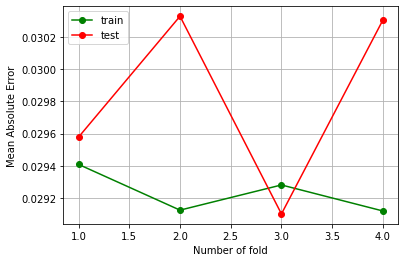

In [6]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, mae_train, 'o-', color='green', label='train')
plt.plot(folds, mae_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Mean Absolute Error')
plt.show()

Notamos que el MAE para el conjunto de entrenamiento es de alrededor de 0.0292 y 0.0294 para los k folds. El MAE del conjunto de prueba varía entre 0.0292 y 0.0302. Ambos valores parecen pequeños, por lo que no parece haber overfitting. Sin embargo, podemos probar varios métodos para evitar el overfitting y ver el resultado. Algunos métodos son:
- Disminuir la complejidad
- Ajustar los parámetros
- Cambiar el modelo

Agrupemos el código anterior en una función:

In [7]:
def test_model(model, X, y):
    
    # Entrenamos iterativamente y calcumamos MAE
    kf = KFold(n_splits=4)
    mae_train = []
    mae_test = []

    for train_index, test_index in tqdm(kf.split(X)):
        X_train, X_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
        y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        mae_train.append(mean_absolute_error(y_train, y_train_pred))
        mae_test.append(mean_absolute_error(y_test, y_test_pred))
    
    # Graficamos
    folds = range(1, kf.get_n_splits() + 1)
    plt.plot(folds, mae_train, 'o-', color='green', label='train')
    plt.plot(folds, mae_test, 'o-', color='red', label='test')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of fold')
    plt.ylabel('Mean Absolute Error')
    plt.show()

## Disminuir la complejidad
Intentaremos mejorar el modelo escalando las características de entradas a valores entre 0 y 1. Para esto utilizamos <code>MinMaxScaler<\code>

In [8]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'


for column in list(X.columns):
    feature = np.array(X[column]).reshape(-1,1)
    scaler = MinMaxScaler()
    scaler.fit(feature)
    feature_scaled = scaler.transform(feature)
    X[column] = feature_scaled.reshape(1,-1)[0]

In [9]:
X.head()

,pT_j1,m_j1,eta_j1,phi_j1,E_j1,tau_21_j1,nhadrones_j1,pT_j2,m_j2,eta_j2,phi_j2,E_j2,tau_21_j2,nhadrones_j2,m_jj,deltaR_j12,n_hadrones
0,0.030817,0.060442,0.536650,0.060146,0.023201,0.475308,0.137795,0.258928,0.038205,0.513989,0.562658,0.158542,0.542914,0.129032,0.064709,0.459224,0.136752
1,0.054860,0.347274,0.677163,0.717330,0.153416,0.237166,0.326772,0.271299,0.265572,0.320331,0.215710,0.273607,0.210758,0.387097,0.448288,0.568772,0.305983
2,0.005314,0.365137,0.452848,0.824763,0.040463,0.181252,0.464567,0.197425,0.068814,0.530244,0.326469,0.122324,0.553353,0.233871,0.320741,0.456545,0.285470
3,0.030284,0.292191,0.568038,0.973537,0.051546,0.010218,0.251969,0.240553,0.105727,0.561380,0.448647,0.158201,0.537672,0.354839,0.291209,0.495198,0.263248
4,0.003701,0.073212,0.332710,0.041100,0.075689,0.322283,0.208661,0.203064,0.093972,0.719241,0.542173,0.247254,0.599557,0.225806,0.114558,0.581194,0.239316


4it [25:21, 380.31s/it]


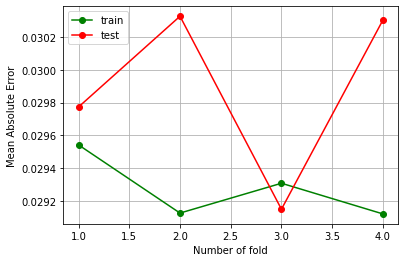

In [10]:
model = GradientBoostingClassifier()
test_model(model, X, y)

Lo obtenido indica que escalar las características no disminuye ni aumenta el error.

Para reducir la complejidad también podemos reducir el número de características. Esto lo podemos hacer con Principal Component Analysis (PCA). Podemos reducir el número de características de 17 a 5:

4it [07:50, 117.55s/it]


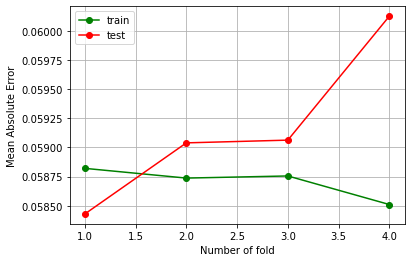

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)
X_pca = pd.DataFrame(X_pca)
test_model(model, X_pca, y)

Disminuir el número de características aumenta tanto el error en el conjunto de prueba como en el de entrenamiento.

## Ajuste de parámetros

In [ ]:
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier()
param_grid = {
    'loss' : ['deviance', 'exponential'],
    'learning_rate': np.arange(0.1,1),
    'criterion' : ['friedman_mse', 'mse', 'mae'],
    'max_features' : ['auto', 'sqrt', 'log2', int, float]
}
grid = GridSearchCV(model, param_grid = param_grid, cv=4)
grid.fit(X, y)
best_estimator = grid.best_estimator_

C:\Users\maria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maria\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\maria\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 292, in _check_params
    if 0. < self.max_features <= 1.:
TypeError: '<' not supported between instances of 'float' and 'type'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\maria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these par

C:\Users\maria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maria\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\maria\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 292, in _check_params
    if 0. < self.max_features <= 1.:
TypeError: '<' not supported between instances of 'float' and 'type'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\maria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these par

C:\Users\maria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maria\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\maria\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 292, in _check_params
    if 0. < self.max_features <= 1.:
TypeError: '<' not supported between instances of 'float' and 'type'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\maria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these par

C:\Users\maria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\maria\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maria\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\maria\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 292, in _check_params
    if 0. < self.max_features <= 1.:
TypeError: '<' not supported between instances of 'float' and 'type'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\maria\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1118: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming

## Cambio de modelo
Veamos si cambiando el modelo disminuyen los errores:

4it [29:03, 435.81s/it]


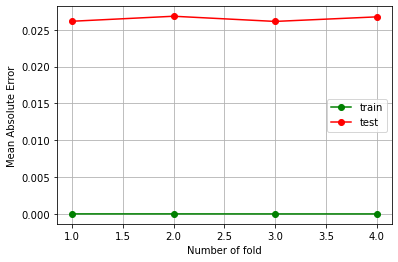

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
test_model(model, X, y)